# 9장 회귀분석


    

## 목차

1. 회귀분석: 원인과 결과의 연관을 찾는다
2. 최소제곱법: 데이터에 수식을 동일하게 적용한다
3. 결정계수: 회귀선의 정확도를 평가한다
4. t 검정: 회귀선의 기울기를 검정한다
5. 잔차분석: 분석의 적절성을 검토한다
6. 중회귀분석: 원인이 여럿일 때의 회귀분석
7. 다중공선성: 설명변수 간의 문제
8. 변수선택법: 유효한 설명변수를 고른다
9. 절편 더미: 질의 차이를 설명하는 변수
10. 기울기 더미: 질의 차이를 설명하는 변수
11. 프로빗 분석: 더미변수를 이용한 회귀분석
12. 생존곡선: 사건 발생까지의 시간을 분석한다
13. 생존곡선의 비교: 사건 발생까지의 시간을 분석한다
14. Cox 비례 해저드 회귀: 사건 발생까지의 시간을 분석한다

In [0]:
!pip install --upgrade -q gspread

## 1. 회귀분석

회귀분석은 변수 x(원인)가 변수 y(결과)에 주는 영향을 알기 위한 방법이다. 변수 x와 변수 y 사이에 있는 관계를 직선 또는 곡선의 식으로 나타낸 것을 회귀선이라고 한다.

### 회귀선

* 회귀분석을 이용하면 **원인이 결과에 주는 영향의 정도를 수치화할 수 있고** 예측 등에 이용할 수 있다.
* **추정된 관계(회귀선)가 통계적으로 의미있는 것인지 아닌지를 확인할 수 있다**.

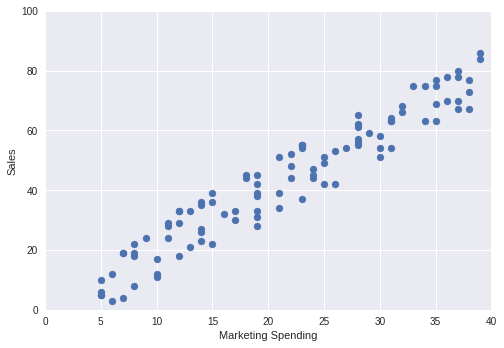

Correlation 
 [[1.         0.96068706]
 [0.96068706 1.        ]]


In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 만들기
marketing = np.random.randint(5, 40, 100)
sales = marketing * 2 + np.random.randint(-10, 10, 100)

# 산점도 그리기
plt.scatter(x = marketing, y = sales)
plt.xlabel('Marketing Spending')
plt.ylabel('Sales')
plt.axis([0, 40, 0, 100])

plt.show()

print('Correlation \n', np.corrcoef(marketing, sales))

Coefficients: 
 [2.02931856]
Mean squared error: 34.72
Variance score: 0.92


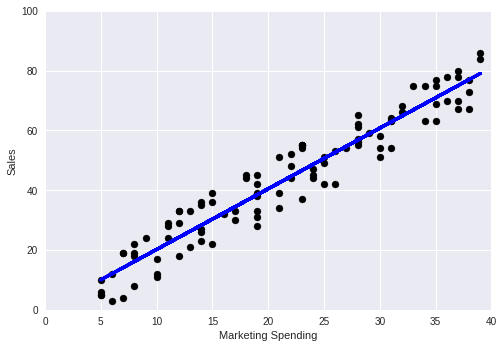

In [0]:
# sci-kit learn 라이브러리에서 linear_model 모듈 불러오기
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
model = lm.fit(marketing.reshape(-1, 1), sales)

sales_pred = model.predict(marketing.reshape(-1, 1))

print('Coefficients: \n', model.coef_) # 계수 확인하기
print('Mean squared error: %.2f'
     % mean_squared_error(sales, sales_pred)) # RMSE 확인하기
print('Variance score: %.2f' % r2_score(sales, sales_pred)) # R-squared 확인하기

plt.scatter(marketing, sales, color = 'black')
plt.plot(marketing, sales_pred, color = 'blue', linewidth = 3)

plt.xlabel('Marketing Spending')
plt.ylabel('Sales')
plt.axis([0, 40, 0, 100])

plt.show()

### 회귀식의 이론 모델

$$ y = \beta_0 + \beta_1 x + \epsilon $$

* $y$ : 피설명변수, 종속변수
* $\beta_0$ : 절편
* $\beta_1$ : 기울기
* $\epsilon$ : 오차항, ~ N(0, 1)

### 최소제곱법을 이용해서 추정한 회귀식

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$

* $\hat{y} $ : $y$ 의 예측값
* $\hat{\beta_0}$ : $\beta_0$ 의 추정치
* $\hat{\beta_1}$ : $\beta_1$ 의 추정치


#### 파라미터와 추정값

* 파라미터는 수치가 들어가는 것은 알고 있지만 아직 어떤값이 될지 모른다는 것을 나타낸다.
* 추정값은 구체적인 수치를 알고 있는 것으로 취급한다. (불편추정량과 기호는 같지만 의미는 다르다.)


## 2. 최소제곱법 (OLS; Ordinary Least Squares)

* 최소제곱법은 회귀선의 파라미터 값을 추정하는 방법 중 하나이다.
* 잔차($\hat{\epsilon}$) 란 관측값과 예측값의 차이($y - \hat{y}$) 을 말한다.


1. 관측데이터($x_i, y_i$) 에 잘 들어맞는 직선을 긋고 싶다.
2. 회귀선과 관측 데이터까지의 잔차를 최소로 한다.
3. 잔차를 제곱해서 더하고 (잔차제곱합, SSR) 그것이 최소가 되도록 절편과 기울기를 선택한다.
4. 회귀선이 추정된다.


**SST = SSR + SSE**

* SST(Total Sum of Squared) : $ \sum_i^n{(y_i - \bar{y})^2} $
* SSR(Residual Sum of Squared) : $ \sum_1^n{\epsilon_i^2} = \sum_i^n{(\hat{y}_i - \bar{y})^2} $
* SSE(Error Sum of Squared) : $ \sum_i^n (y_i - \hat{y_i})^2$

### 최소제곱법으로 추정값 구하는 법(단순회귀의 경우)

* 함수 J는 x와 y 의 함수가 아니라 $\hat{\beta_0}$ 와 $\hat{\beta_1}$ 의 함수로 생각한다.
* 둘 이상의 변수가 있는 함수를 하나의 함수에 대해 미분하는 것을 편미분이라고 한다.
* 편미분의 기호는 '$d$' 가 아니라 '$\partial$'을 이용한다.
* 하나의 변수에 대해 편미분할 때 그 이외의 변수는 상수로 취급한다.
* 그런데 함수 J 를 $\hat{\beta_0}$ 와 $\hat{\beta_1}$에 대해 각각 편미분하면 다음과 같다.
  * $\frac{\partial J}{\partial \hat{\beta_0}} = \sum \frac{\partial}{\partial \beta_0} (y_i - \beta_0 - \beta_1 x_i)^2 =  $

## 3. 결정계수: 회귀선의 정확도를 평가한다.

결정계수는 추정된 회귀선이 얼마나 관측 데이터에 들어맞을지(어느 정도의 적합성을 갖고 있을지)를 가늠하는 지표이다. 0에서 1 사이의 값을 취하며, 1에 가까울수록 전체 변동에서 추정된 회귀선으로 설명할 수 있는 변동이 높다는 말이다.

단순선형회귀에서의 결정계수는 관측값(y)과 예측값($\hat{y}$)의 상관계수의 제곱과 같다.

$$R^2 = \frac{예측값으로 설명되는 변동}{전체 변동} = \frac{\sum(\hat{y_i} - \bar{y})^2}{\sum(y_i - \bar{y})^2}$$

![Coefficient of determination](https://www.researchgate.net/profile/Christian_Gold2/publication/322398615/figure/fig17/AS:581620512903169@1515680544091/Visualization-of-SSE-SSR-SST.png)



In [0]:
# 결정계수
model.score(marketing.reshape(-1, 1), sales)

0.9229196312391211

## 4. t 검정: 추정된 회귀선의 기울기를 검정한다.

추정된 회귀계수가 0과 같은 경우, 변수 x는 변수 y 의 원인이라고 할 수 없다. 이를 통계적으로 확인하기 위해 $H_0 : \beta_1 = 0\ vs\ H_1: \beta_1 \ne 0$ 으로 해서 가설검정을 한다.

* 표본평균이 확률변수이듯이 표본으로부터 추정하는 회귀계수(절편과 기울기)도 확률변수이다. 즉, 서로 다른 표본에서 추정되는 회귀 계수의 값이 다를 수 있다.
* 추정된 기울기가 0과 통계적으로 다른지 어떤지는 회귀분석에서 중요한 의미를 갖는다.

### t 검정

* $\hat{\beta_1}$ 은 평균이 $\beta_1$이고 분산이 $\frac{\sigma^2}{\sum({x_i - \bar{x}})^2}$ 인 정규분포를 따른다. 여기서 $\sigma^2$ 은 오차항의 분산을 나타낸다.
* 그러나 오차항의 분산($\sigma^2$) 을 아직 모르므로 잔차($\hat{e_i}^2$) 를 사용해 표본에서 추정한다($\sigma^2 => \hat{\sigma^2} = \frac{\sum\hat{e_i}^2}{n - 2}$). 여기서 $n - 2$ 는 $\sum\hat{e_i}^2$ 의 자유도이다.
* $\hat{\sigma}^2$ 을 이용해서 $\hat{\beta_1}$ 의 준표준화변량(t값)을 구하면 $t = \frac{\hat{\beta_1} - \beta_1}{\sqrt{\hat{\sigma}^2 / \sum(x_i - \bar{x})^2}}$ 이 된다. 이것은 자유도 $n  2 $ 인 t 분포를 따른다.


1. 가설 설정
    * $H_0 : \beta_1 = 0$
    * $H_1: \beta_1 \ne 0$
2. $t = \frac{\hat{\beta_1} - \beta_1}{\sqrt{\hat{\sigma}^2 / \sum(x_i - \bar{x})^2}}$ 에 $\beta_1 = 0$ (귀무가설)을 대입
3. $t값 =\frac{회귀계수의 추정값}{\hat{\beta_1} 의 불편표준오차} =  \frac{\hat{\beta_1}}{\sqrt{\hat{\sigma}^2 / \sum(x_i - \bar{x})^2}}$
4. $|t| > t_{n-2, \alpha/2}$ 일 때, $H_0$ 를 기각($t_{n-2, \alpha/2}$ 는 자유도 $n-2$ 일 때 유의수준 $\alpha/2$ 의 t값)

![t distribution rejection area](https://mblogthumb-phinf.pstatic.net/20160610_53/leerider_1465531441026rFNPp_PNG/%C1%A6%B8%F1_%BE%F8%C0%BD1.png?type=w2)

## 5. 잔차분석: 분석의 적절성을 검토한다.

잔차($\hat{\epsilon}$) 와 예측값($\hat{y}$) 의 산포도(잔차 플롯)를 그리면 데이터의 문제(이상치가 포함되어 있음)나 모델의 문제(회귀식이 부적절)을 발견할 수 있다.

단순선형회귀분석에서 잔차 플롯은 아래의 항목들을 만족해야 한다.

1. 잔차는 정규분포를 따른다(정규성).
2. 잔차의 분산은 일정하다(등분산성).
3. 잔차는 서로 독립이다(독립성).
4. 잔차에는 특정한 패턴이 보이지 않아야한다.
5. 이상치가 없어야한다.


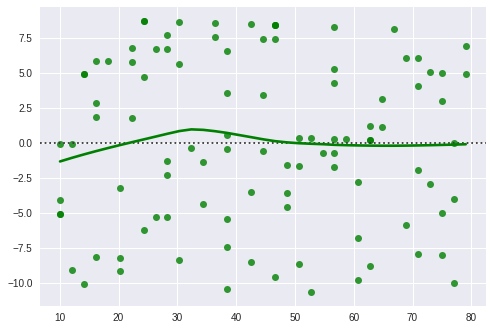

In [0]:
import seaborn as sns

resid = sales - sales_pred
sns.residplot(sales_pred, resid, lowess = True, color = 'g')

## 6. 다중회귀분석: 원인이 여럿일 때의 회귀분석

설명변수가 여러 개 있을 경우는 다중회귀분석을 이용한다. 설명변수의 수가 다른 회귀식의 적합도를 비교할 경우에는 자유도 조정이 끝난 결정계수(Adjusted $R^2$)를 이용한다.

**편회귀계수**

* 다중회귀분석의 회귀계수를 *편회귀계수*라고 한다.
* 편회귀계수는 회귀식에 포함되는 다른 변수의 영향을 제거한 후의 (다른 변수를 '일정'으로 했을 때의), 해당 설명변수가 반응변수에 주는 영향을 나타낸다.

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$


* 설명변수가 두 개인 경우 회귀선이 아니라 회귀평면으로 추정한다.

![regression plane](https://www.eea.europa.eu/data-and-maps/figures/illustration-of-the-statistical-analysis/illustration-of-the-statistical-analysis/image_large)

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2$$



**표준편회귀계수**

* 모든 변수(설명변수, 반응변수)를 표준화해서 중회귀분석을 했을 때의 회귀계수이다.

$$ \frac{y - \bar{y}}{Sy} = \beta_1\frac{x_1 - \bar{x_1}}{Sx_1} + \beta_2\frac{x_2 = \bar{x_2}}{Sx_2} + ... + \beta_n\frac{x_n - \bar{x_n}}{Sx_n} + \epsilon$$

* 단위가 다른 설명변수 간에 회귀계수의 크기를 비교할 경우에 사용한다.
* 표준화된 반응변수의 평균값은 0이기 때문에 절편 $\beta_0$ 도 0이다.


**자유도가 조정된 결정계수(Adjusted $R^2$)**

* 결정계수는 설명변수를 늘리면 값이 커지는 결점이 있다.
* 그래서 변수를 추가해도 결정계수의 값이 증가하지 않도록 고안한 지표가 *자유도 조정 결정계수(Adjusted $R^2$)* 이다.
* 설명변수의 수가 다른 여러 회귀식(반응변수는 같음)의 적합도를 비교할 때 사용한다.
* 자유도가 조정된 결정계수는 거의 통계분석용 소프트웨어에서 출력되지만, 결정계수로도 간단히 구할 수 있다.

$$Adjusted \ R^2 = 1 - (1 - R^2)\frac{n - 1}{n - k - 1}$$



In [0]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 데이터 불러오기
dat = sm.datasets.get_rdataset('Guerry', 'HistData').data

# 데이터 확인하기
print(dat.describe())

# 회귀식 적합하기
model1 = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data = dat).fit()
model2 = smf.ols('Lottery ~ Literacy + np.log(Pop1831) + np.log(Crime_prop)', data = dat).fit()

# 결과 확인하기
print(model1.summary())
print(model2.summary())

             dept    Crime_pers    Crime_prop   Literacy     Donations  \
count   86.000000     86.000000     86.000000  86.000000     86.000000   
mean    46.883721  19754.406977   7843.058140  39.255814   7075.546512   
std     30.426157   7504.703073   3051.352839  17.364051   5834.595216   
min      1.000000   2199.000000   1368.000000  12.000000   1246.000000   
25%     24.250000  14156.250000   5933.000000  25.000000   3446.750000   
50%     45.500000  18748.500000   7595.000000  38.000000   5020.000000   
75%     66.750000  25937.500000   9182.250000  51.750000   9446.750000   
max    200.000000  37014.000000  20235.000000  74.000000  37015.000000   

            Infants       Suicides     Wealth   Commerce     Clergy  \
count     86.000000      86.000000  86.000000  86.000000  86.000000   
mean   19049.906977   36522.604651  43.500000  42.802326  43.430233   
std     8820.233546   31312.532649  24.969982  25.028370  24.999549   
min     2660.000000    3460.000000   1.000000   1

## 7. 다중공선성: 설명변수 간의 문제

* 설명변수들 간에 높은 상관관계(다중공선성)가 있을 경우, 회귀계수가 기대한 부호(+, -)가 되지 않는 등 결과를 해석하기 어려워질 수가 있다.
* 다중공선성을 발견하려면 VIF(Variance Inflation Factor; 분산팽창요인)와 허용도라는 지표를 이용한다.

**설명변수 간의 관련**

* 설명변수 간에 강한 관련성이 있을 때, *다중공선성*이 있다고 한다.
* 특히 변수 $x_1$과 변수 $x_2$ 사이에 완전한 상관관계(상관계수 = 1)가 있을 때, *완전 다중공선성*이 생겼다고 한다. 이 경우에는 추정이 불가능하다(어느 한쪽의 변수를 회귀식에서 제거해야 한다).
* 여러 설명변수들 사이에서 한 설명변수를 다른 설명변수들의 함수로 나타낼 수 있는 경우에도 마찬가지이다.
* (불완전한) 다중공선성의 경우에는 추정값을 구할 수가 있다. 그러나 어떤 변수의 변동이 다른 변수의 변동에 강하게 영향을 미치기 때문에 편회귀계수의 표준오차가 커져 추정값의 신뢰도가 낮아진다.

**VIF(분산팽창요인)**

* 다중공선성을 발견하기 위한 지표로, 회귀계수의 분산(표준오차)이 얼마나 커지는지를 나타낸다.

$$VIF_i  = \frac{1}{1 - R_i^2}$$

* $R_i^2$: $i$번째 설명변수를 반응변수로 두고 나머지 설명변수로 회귀분석을 진행했을 때의 결정계수
* 대부분의 통계 소프트웨어에서는 VIF 를 출력하므로 이 값이 10이 넘지 않는지 체크한다.
* VIF 가 10보다 클 경우 변수를 제외하거나 합성하는 등의 대응이 필요하다.
* 허용도(tolerance)를 이용할 경우에는 0.1 이상이면 문제가 없다고 할 수 있다.




## 8. 변수선택법: 유효한 설명변수를 고른다.

* 어느 설명변수를 회귀식에 포함시킬지를 정하는 방법이다.
* 대부분의 통계 소프트웨어는 자동적으로 변수를 선택하도록 할 수 있다.
* 회귀식에서 변수를 삭제하는 기준, 회귀식에 변수를 t 검정의 p값(=0.1) 외에 t 값을 제곱한 F 값(=2.0) 을 많이 사용한다.
* 일반적으로는 AIC(Akaike Information Criterion) 을 주로 사용하고, 그 외에도 BIC(Bayes Information Criterion), Likelihood Ratio Test 를 사용하기도 한다.

**변수 선택 방법**

* 전진선택법 (Forward Selection):설명변수가 0개인 모형부터 시작해서 변수를 하나씩 추가하는 방법
* 후진제거법 (Backword Elimination): 모든 설명변수를 넣은 모형부터 시작해서 변수를 하나씩 제거하는 방법
* 단계선택법(Step-wise Selection): 모든 설명변수를 넣은 모형부터 시작해서 단계마다 변수를 제거 및 추가하는 방법
* 모든 부분집합 회귀(All subset regression): Stepwise regression 에서는 모든 가능한 모형을 비교해주지는 않기 때문에 여기서 선택된 모형이 최선의 모형이라는 보장이 없다. 그래서 모든 가능한 조합을 보여주는 변수 선택 방법을 사용하기도 한다.

[R강의 6. 회귀진단과 모형의 선택 - 문건웅](https://rstudio-pubs-static.s3.amazonaws.com/190997_40fa09db8e344b19b14a687ea5de914b.html)

## 9. 절편 더미: 질의 차이를 설명하는 변수 (1)

* 더미 변수(dummy variable)란 1 또는 0의 값을 취하는 변수를 의미한다.
* 더미변수를 이용하면 집단간의 차이를 검정할 수 있다.

**절편 더미를 이용한 회귀식**

$$y = \beta_0 + \beta_1x + \beta_2D + \epsilon$$

* 계수 $\beta_2$ 가 통계적으로 유의할 때 회귀선의 절편이 집단마다 다르다.


In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.api as sm

boston = load_boston()
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
dummy_chas = pd.get_dummies(boston_features.CHAS)
boston_features = boston_features.join(dummy_chas)
boston_features = sm.add_constant(boston_features)
boston_features = boston_features.drop('CHAS', axis = 1)
boston_target = pd.DataFrame(boston.target, columns = ['MEDV'])

model = sm.OLS(boston_target, boston_features)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Dec 2018   Prob (F-statistic):          6.95e-135
Time:                        15:49:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2236      3.407      7.403      0.0

## 10. 기울기 더미: 질의 차이를 설명하는 변수 (2)

* 절편과 기울기에도 그룹 간에 차이를 나타내는 경우가 있다. 그 경우에는 기울기(계수) 더미를 사용한다. 기울기 더미는 더미 변수와 설명 변수를 곱해서 만든다.

$$y = \beta_0 + \beta_1x + \beta_2D + \beta_3 Dx + \epsilon$$

* 계수 $\beta_3$ 가 통계적으로 유의할 때 회귀선의 *기울기* 가 그룹마다 다르다.
* 절편에 차이가 없을 때는 기울기 더미만으로도 충분하다.


## 11. 프로빗 분석: 더미변수를 이용한 회귀분석

* 반응변수가 더미변수인 경우에 이용하는 분석방법이다.

**선택확률**

* 아래 그림은 자동차 구매(z = 1: 구입했다, z = 0: 구입하지 않았다)와 구입자의 소득관계를 그래프로 나타낸 것이다.
* 반응변수가 더미변수라도 최소제곱법(OLS)에 의해 회귀선을 얻을 수 있다. 하지만 예측값이 0과 1의 범위 밖에 있을 수도 있고, 오차항의 분산도 일정하지 않으므로 OLS 를 이용한 분석은 바람직하지 않다.